# Dataset Homework

I chose to use a dataset that looks at the relationship between music preference and self-reported mental health status, in order to improve the application and therefore efficiency of Music Therapy.

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for 'happy' hormones such as oxytocin.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
mxmf_df = pd.read_csv(r"C:\Users\Aadam\Code_Lancashire\Datasets\mxmh_survey_results.csv", sep=',')

In [28]:
mxmf_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [29]:
mxmf_df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [30]:
mxmf_df['Fav genre'].unique

<bound method Series.unique of 0                 Latin
1                  Rock
2      Video game music
3                  Jazz
4                   R&B
             ...       
731                Rock
732                 Pop
733                 Rap
734           Classical
735             Hip hop
Name: Fav genre, Length: 736, dtype: object>

In [24]:
genre_counts = mxmf_df['Fav genre'].value_counts()
print(genre_counts)

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64


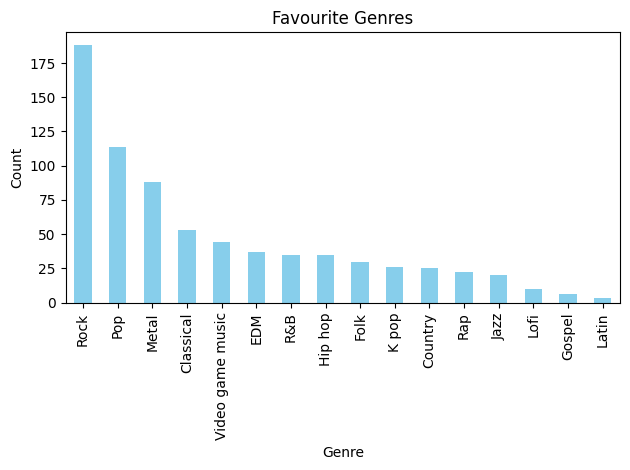

In [25]:
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Favourite Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#I utilised a standard bar chart to showcase the distribution of music preference across the genres.

In [52]:
avg_dep = mxmf_df.groupby('Fav genre')['Depression'].mean()
print(avg_dep)

#Wanted to generate the average values per genre for depression.

Fav genre
Classical           4.075472
Country             4.320000
EDM                 5.243243
Folk                5.066667
Gospel              2.666667
Hip hop             5.800000
Jazz                4.500000
K pop               4.423077
Latin               3.000000
Lofi                6.600000
Metal               5.068182
Pop                 4.486842
R&B                 3.828571
Rap                 4.000000
Rock                5.236702
Video game music    4.477273
Name: Depression, dtype: float64


In [53]:
avg_anx = mxmf_df.groupby('Fav genre')['Anxiety'].mean()
print(avg_anx)

##Wanted to generate the average values per genre for anxiety.

Fav genre
Classical           4.886792
Country             5.400000
EDM                 5.486486
Folk                6.566667
Gospel              4.833333
Hip hop             6.200000
Jazz                5.900000
K pop               6.230769
Latin               4.333333
Lofi                6.100000
Metal               5.761364
Pop                 6.074561
R&B                 5.171429
Rap                 5.090909
Rock                6.122340
Video game music    5.886364
Name: Anxiety, dtype: float64


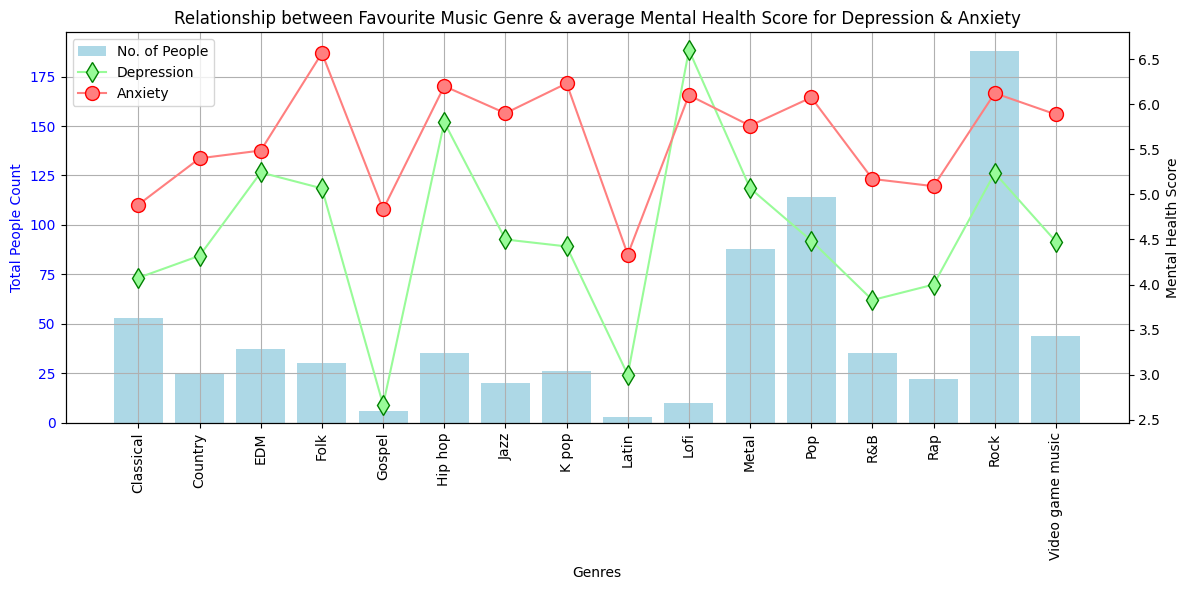

In [143]:
fig, ax1 = plt.subplots(figsize=(12, 6))

plt.title('Relationship between Favourite Music Genre & average Mental Health Score for Depression & Anxiety')

ax1.bar(genres, genre_counts, color='lightblue', label='No. of People')
ax1.set_ylabel('Total People Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Genres', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(genres, rotation=90, ha='center')
ax1.tick_params(axis='x', labelcolor='black')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(genres, avg_dep, color='#98fb98', marker='d', ms=10, mec='green', label='Depression')
ax2.plot(genres, avg_anx, color='#FF7F7F', marker='o', ms=10, mec='red', label='Anxiety')
ax2.set_ylabel('Mental Health Score', color='Black')
ax2.tick_params(axis='y', labelcolor='Black')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()

# I used a mix of Chat GPT and also https://matplotlib.org/ to get code to display the graph showcasing the comparison that I wanted. 